# Objetivo

<span style="color: black; font-family: Arial; font-size: 20px;">
Avaliar e priorizar hipóteses em colaboração com o marketing, conduzindo um teste A/B para identificar métricas sobre receita e conversão entre os dois grupos.

# Preparando os dados

In [6]:
# Carregando todas as bibliotecas
from scipy import stats as st
import numpy as np
import scipy.stats as stats
import pandas as pd
from math import factorial
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Dataframe Hypotheses

In [16]:
# Carregando o dataframe Hypotheses_us
hypothesis = pd.read_csv(r"C:\Users\pedro\Documents\Dataframes projetos\ecommerce-ABtest-analysis\hypotheses_us.csv", sep=';')
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [18]:
# Percorrendo os cabeçalhos e convertendo tudo em minúsculos
new_col_names=[]
for old_name in hipoteses.columns:
    name_lowered=old_name.lower()
    new_col_names.append(name_lowered)
hypothesis.columns=new_col_names
print(hypothesis.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')


In [20]:
# Verificando e tratando valores duplicados
print(hypothesis.duplicated().sum())

0


In [22]:
hypothesis.head()

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


### Dataframe Orders

In [30]:
# Carregando o dataframe Orders
orders = pd.read_csv(r"C:\Users\pedro\Documents\Dataframes projetos\ecommerce-ABtest-analysis\orders_us.csv", sep=',')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [32]:
# Transformando a coluna date em 'DATETIME'
orders['date'] = pd.to_datetime(orders['date'])

In [34]:
# Renomeando as colunas 'transactionId' e 'visitorId'
columns_new = {'transactionId': 'transaction_id', 'visitorId': 'visitor_id'}
orders.rename(columns=columns_new, inplace=True)
print(orders.columns)

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')


In [36]:
# Verificando e tratando valores duplicados
print(orders.duplicated().sum())

0


In [54]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


### Dataframe Visits

In [44]:
# Carregando o dataframe Visits
visits = pd.read_csv(r"C:\Users\pedro\Documents\Dataframes projetos\ecommerce-ABtest-analysis\visits_us.csv")
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [46]:
# Transformando a coluna date em 'DATETIME'
visits['date'] = pd.to_datetime(visits['date'])

In [48]:
# Verificando e tratando valores duplicados
print(visits.duplicated().sum())

0


In [50]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


# Parte 1. Priorizando Hipóteses #

<span style="color: blue; font-family: Arial; font-size: 20px;">
Aplicando o framework ICE para priorizar hipóteses e as classificando em ordem decrescente de prioridade.

In [67]:
# Encontrando ICE
hypothesis['ICE'] = (hypothesis['impact']*hypothesis['confidence'])/hypothesis['effort']
print(hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

                                          hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


<span style="color: blue; font-family: Arial; font-size: 20px;">
Aplicando o framework RICE para priorizar hipóteses e as classificando em ordem decrescente de prioridade.

In [69]:
# Encontrando RICE
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['effort']
print(hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

                                          hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


<span style="color: blue; font-family: Arial; font-size: 20px;">
Analisando a mudança de priorização de hipóteses quando é usado o RICE ao invés de ICE.

In [73]:
hypothesis.head()

,hypothesis,reach,impact,confidence,effort,ICE,RICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


<span style="color: black; font-family: Arial; font-size: 20px;">

A priorização de hipóteses muda quando é usado o RICE ao invés de ICE porque RICE considera o alcance (reach). A hipótese 8, por exemplo, ficou em primeiro lugar usando o método ICE de cálculo. Porém, ao adicionar os valores de alcance (reach) e calcular o RICE, a hipótese 8 foi para o quinto lugar, notando-se a diferença que a adição do parâmetro reach causa no cálculo.

Juntando os dois cálculos ICE e RICE, quando há parâmetros suficientes para seus cálculos, é possível filtrar melhor quais são as melhores hipóteses. Nesse caso, as hipóteses 7, 0, 6 e 2 são as melhores.

# Parte 2. Análise de teste A/B #

<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculando a receita acumulada por grupo.

In [81]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [83]:
# Construindo um vetor com valores de pares unívocos de grupos de datas 
dates_groups = orders[['date','group']].drop_duplicates()

In [85]:
# Obtendo dados diários cumulativos agregados sobre pedidos 
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, 'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
orders_aggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,2356.8
66,2019-08-01,B,21,20,1620.0
175,2019-08-02,A,44,38,3860.3
173,2019-08-02,B,45,43,4243.8
291,2019-08-03,A,68,62,5675.5


In [87]:
# Obtendo dados diários cumulativos agregados sobre visitantes  
visits_aggregated = dates_groups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
visits_aggregated.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [89]:
# Unindo os dataframes com dados cumulativos
cumulative_info = orders_aggregated.merge(visits_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_info.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

cumulative_info.head()

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


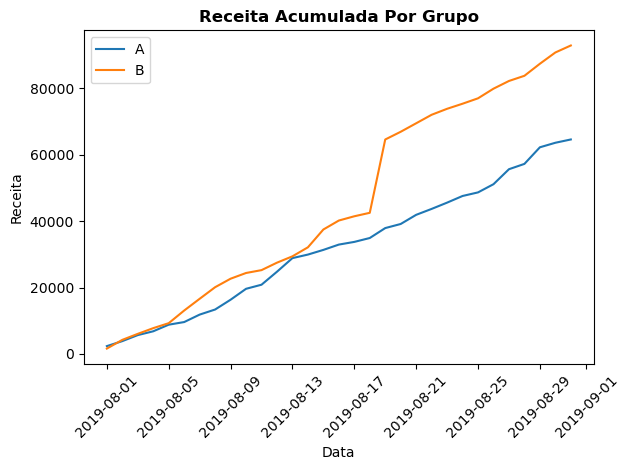

In [99]:
# DataFrame com pedidos cumulativos e receita cumulativa do grupo A
cumulative_revenue_A = cumulative_info[cumulative_info['group']=='A'][['date','revenue', 'orders']]

# DataFrame com pedidos cumulativos e receita cumulativa do grupo B
cumulative_revenue_B = cumulative_info[cumulative_info['group']=='B'][['date','revenue', 'orders']]

# Construindo o gráfico de receita do grupo A 
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')

# Construindo o gráfico de receita do grupo B 
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')

plt.xticks(rotation=45)
plt.title('Receita Acumulada Por Grupo', fontweight='bold')
plt.xlabel('Data')
plt.ylabel('Receita')
plt.legend()
plt.tight_layout()
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
A receita está apresentando um crescimento estável ao longo do teste. 
    
Destaca-se o grupo B que se manteve à frente do grupo A durante praticamente todo o teste.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculando o tamanho médio acumulado de pedidos por grupo.

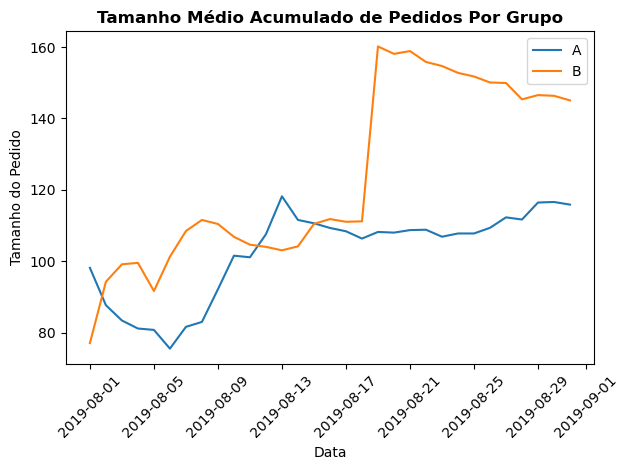

In [104]:
# Dividindo a receita cumulativa pela quantidade cumulativa de pedidos, e criando um gráfico
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'], label='B')

# Plotando um gráfico
plt.xticks(rotation=45)
plt.title('Tamanho Médio Acumulado de Pedidos Por Grupo', fontweight='bold')
plt.xlabel('Data')
plt.ylabel('Tamanho do Pedido')
plt.legend()
plt.tight_layout()
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
Durante o teste, o tamanho médio acumulado de pedidos por grupo termina em uma grande alta para o grupo B em relação ao grupo A.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculando a diferença relativa no tamanho médio acumulado do pedido para o grupo B em comparação com o A.

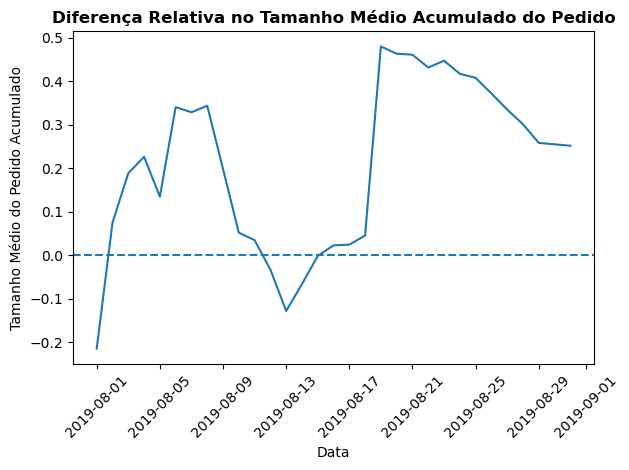

In [111]:
# Reunindo os dados em um DataFrame
merged_cumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Construindo um gráfico de diferença relativa para os volumes médios de compra
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])\
         /(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)


plt.xticks(rotation=45)
plt.axhline(y=0, linestyle='--')
plt.title('Diferença Relativa no Tamanho Médio Acumulado do Pedido', fontweight='bold')
plt.xlabel('Data')
plt.ylabel('Tamanho Médio do Pedido Acumulado')
plt.tight_layout()
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
Em alguns pontos, nota-se que a diferença entre os segmentos apresenta picos. Isso indica a ocorrência de pedidos grandes e valores atípicos.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculando a taxa de conversão de cada grupo e analisando a proporção de pedidos para o número de visitas para cada dia.

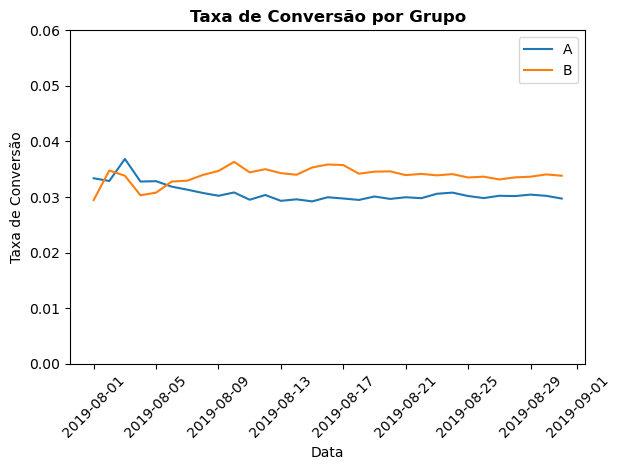

In [116]:
# Calculando a conversão cumulativa
cumulative_info['conversion'] = cumulative_info['orders']/cumulative_info['visits']

# Selecionando dados do grupo A
cumulative_info_A = cumulative_info[cumulative_info['group']=='A']

# Selecionando dados do grupo B
cumulative_info_B = cumulative_info[cumulative_info['group']=='B']

# Construindo o gráfico
plt.plot(cumulative_info_A['date'], cumulative_info_A['conversion'], label='A')
plt.plot(cumulative_info_B['date'], cumulative_info_B['conversion'], label='B')
plt.title('Taxa de Conversão por Grupo', fontweight='bold')
plt.xlabel('Data')
plt.ylabel('Taxa de Conversão')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.ylim(0, 0.060)
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
Os dois grupos flutuaram em torno de valores próximos apenas no começo do teste, porém a taxa de conversão do grupo B subiu e se estabilizou, enquanto a taxa de conversão do grupo A caiu e então se tornou estável.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculando a diferença relativa na conversão cumulativa para o grupo B em comparação com o grupo A.

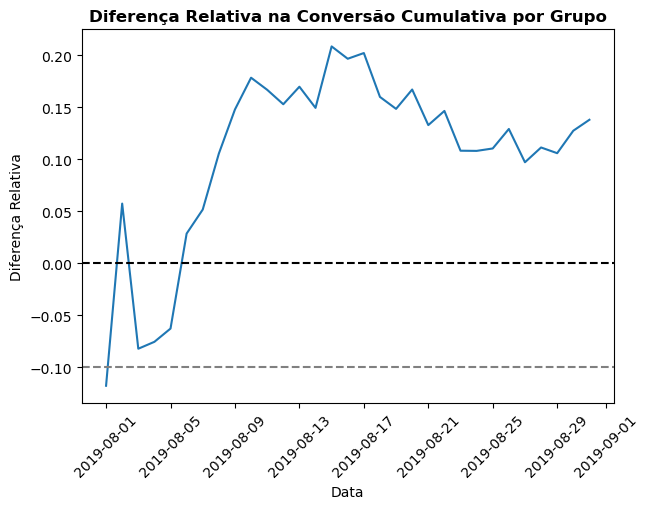

In [122]:
# Unindo os dataframes para obter as conversões acumuladas
merged_cumulative_conversions = cumulative_info_A[['date','conversion']].merge(cumulative_info_B[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Criando um gráfico
plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Diferença Relativa na Conversão Cumulativa por Grupo', fontweight='bold')
plt.xlabel('Data')
plt.ylabel('Diferença Relativa')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
No começo do teste, o grupo B deu um pico para cima mas caiu rapidamente. No entanto, ainda no começo do teste, ele deu outro pico para cima e subiu bastante, assumindo a liderança até o final do teste

<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculando os percentis 95 e 99 para o número de pedidos por usuário.

In [126]:
# Definindo a quantidade de pedidos por usuário e plotando dois gráficos
orders_by_users = (orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique}))
orders_by_users.columns = ['visitor_id', 'orders']

print(orders_by_users.sort_values(by='orders', ascending=False).head(10))

      visitor_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


(array([937.,  64.,  17.,   3.,   6.,   0.,   0.,   1.,   1.,   2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

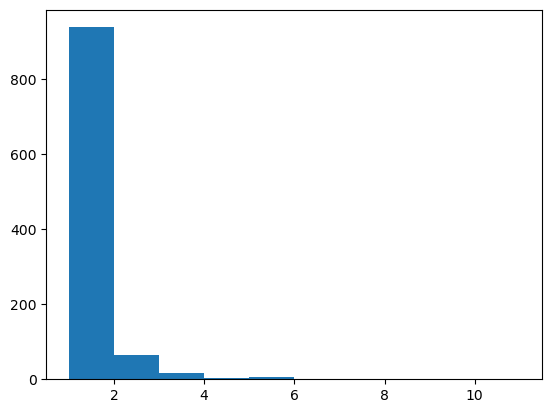

In [129]:
plt.hist(orders_by_users['orders'])

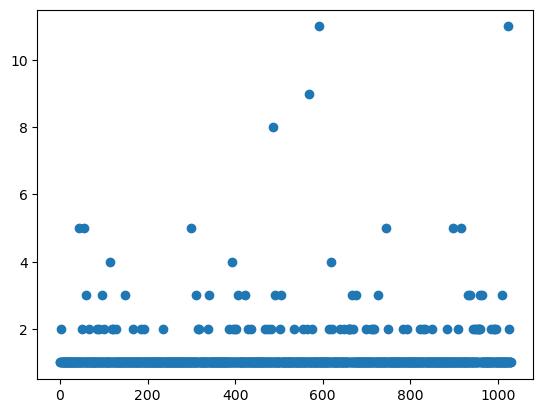

In [131]:
x_values2 = pd.Series(range(0,len(orders_by_users)))

plt.scatter(x_values2, orders_by_users['orders'])

In [133]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[2. 4.]


<span style="color: black; font-family: Arial; font-size: 20px;">
5% dos usuários fez mais do que 2 pedidos, e 1% deles fez mais do que 4 pedidos.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Fazendo um gráfico de dispersão dos tamanhos dos pedidos.

In [137]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


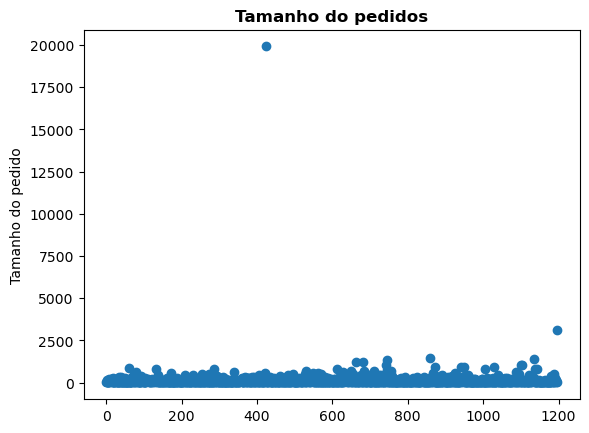

In [155]:
# Plotando o gráfico
x_values1 = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values1, orders['revenue'])
plt.title('Tamanho do pedidos', fontweight='bold')
plt.ylabel('Tamanho do pedido')
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
Com base no gráfico, podemos definir o limite para pedidos anormais entre 2500 e 5000.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculando os percentis 95 e 99 dos preços dos pedidos.

In [150]:
print(np.percentile(orders['revenue'], [95, 99]))

[435.54  900.904]


<span style="color: black; font-family: Arial; font-size: 20px;">
5% dos usuários tem pedidos maiores que 435,54; e 1% deles tem pedidos maiores que 900,90.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculando a significância estatística da diferença na conversão entre os grupos usando os dados brutos.

In [158]:
# Criando as variáveis 'orders_users_A' e 'orders_users_B' para armazenar as colunas ['user_id', 'orders']
orders_users_A = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
orders_users_A.columns = ['user_id', 'orders']

orders_users_B = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
orders_users_B.columns = ['user_id', 'orders']

In [160]:
# Criando uma lista da quantidade de pedidos por cada usuário e zeros para usuários que não realizaram nenhum pedido.
[orders_users_A['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(orders_users_A['orders'])), name='orders')]

[0      1
 1      1
 2      1
 3      1
 4      1
       ..
 498    1
 499    7
 500    1
 501    1
 502    1
 Name: orders, Length: 503, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 18228    0
 18229    0
 18230    0
 18231    0
 18232    0
 Name: orders, Length: 18233, dtype: int64]

In [162]:
# Criando os samples
sample_A = pd.concat([orders_users_A['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(orders_users_A['orders'])), name='orders')],axis=0)

sample_B = pd.concat([orders_users_B['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(orders_users_B['orders'])), name='orders')],axis=0)

In [164]:
# Imprimindo o ganho de conversão relativo para o grupo B
print("{0:.3f}".format(stats.mannwhitneyu(sample_A, sample_B)[1]))

print("{0:.3f}".format(sample_B.mean()/sample_A.mean()-1))

0.017
0.138


<span style="color: black; font-family: Arial; font-size: 20px;">
O valor-p é de 0.017, sendo menor que 0.05. Ou seja, podemos rejeitar a hipótese de que não há diferença estatística significativa na conversão entre os grupos.

O lucro relativo do grupo B é ficou em 13,8%.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Encontrando a significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados brutos.

In [168]:
# Descobrindo a diferença relativa em volume médio de pedidos entre os grupos
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.692
0.252


<span style="color: black; font-family: Arial; font-size: 20px;">
O valor-p é bem maior do que 0.05, então não há motivo para rejeitar a hipótese de que o volume médio de pedidos seria diferente entre os grupos.

O grupo B tem uma média de receita 25,2% maior.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Encontrando a significância estatística da diferença na conversão entre os grupos usando os dados filtrados.

In [172]:
# Considerando pedidos anormais como maiores de 2500, como visto anteriormente; e pessoas que pediram mais de 2 pedidos, representando 5% de usuários e podendo ser considerado anormal
users_with_many_orders = pd.concat([orders_users_A[orders_users_A['orders'] > 2]['user_id'], orders_users_B[orders_users_B['orders'] > 2]['user_id']], axis = 0)
users_with_expensive_orders = orders[orders['revenue'] > 2500]['visitor_id']
abnormal_users = pd.concat([users_with_many_orders, users_with_expensive_orders], axis = 0).drop_duplicates().sort_values()
print(abnormal_users.head(5))
print("Nùmero de usuários anômalos:", abnormal_users.shape)

18    199603092
23    237748145
37    249864742
68    457167155
68    611059232
dtype: int64
Nùmero de usuários anômalos: (22,)


<span style="color: black; font-family: Arial; font-size: 20px;">
Existem 22 usuários considerados anômalos.

In [175]:
# Calculando a significância estatística das diferenças em conversão entre os grupos, usando dados filtrados
sample_A_filtered = pd.concat([orders_users_A[np.logical_not(orders_users_A['user_id'].isin(abnormal_users))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(orders_users_A['orders'])),name='orders')],axis=0)

sample_B_filtered = pd.concat([orders_users_B[np.logical_not(orders_users_B['user_id'].isin(abnormal_users))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(orders_users_B['orders'])),name='orders')],axis=0)

In [177]:
# Imprimindo o ganho de conversão relativo para o grupo B com dados filtrados
print("{0:.3f}".format(stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]))
print("{0:.3f}".format(sample_B_filtered.mean()/sample_A_filtered.mean()-1))

0.014
0.166


<span style="color: black; font-family: Arial; font-size: 20px;">
Os dados filtrados não mudaram muito em relação aos dados brutos, que foram de 0.017 e 0.138, como calculados anteriormente.

O lucro relativo do grupo B com esses dados filtrados agora ficou em 16,6%.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Encontrando a significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados filtrados.

In [181]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean() - 1))

0.635
-0.098


<span style="color: black; font-family: Arial; font-size: 20px;">
Agora o grupo B teve uma média de receita 9,8% menor que o grupo A. 

Ainda assim, o valor-p permanece alto e não há diferença estatisticamente significativa.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Tomando uma decisão com base nos resultados do teste.

<span style="color: black; font-family: Arial; font-size: 20px;">
    Com base nas conclusões apresentadas acima em cada etapa, sobre a significância estatística da diferença na conversão entre os grupos, pode-se concluir que:

1. Em ambos os cenários usando dados brutos e filtrados, a conversão do grupo B é melhor do que a do grupo A;
    
2. Filtrar os usuários anômalos aumentou a diferença relativa (de 13.8% para 16.6%);
    
3. A significância estatística foi preservada (p < 0.05) mesmo após filtragem, o que reforça a confiança na conclusão de que o grupo B tem uma taxa de conversão superior à do grupo A.


    

Sobre a significância estatística da diferença no tamanho médio do pedido entre os grupos, pode-se concluir que:



1. Usuários anômalos estavam inflando a média do grupo B. Após removê-los, o grupo B passa a ter receita média inferior à do grupo A.
    
2. Em ambos os casos, as diferenças não são estatisticamente significativas (p-value > 0.05), então não podemos concluir que um grupo é consistentemente melhor que o outro.
    

<span style="color: black; font-family: Arial; font-size: 20px;">
Portanto,

1. Houve uma diferença estatisticamente significativa na taxa de conversão. Tanto com dados brutos (p = 0.017) quanto com dados filtrados (p = 0.014), o p-valor está abaixo de 0.05, indicando uma diferença estatisticamente confiável entre os grupos.

3. Mesmo o grupo B tendo ficado com uma receita menor do que o grupo A nos dados filtrados, o grupo B converte muito mais usuários. Isso pode compensar ou até superar a perda.

4. A diferença se manteve (ou aumentou) após remover usuários anômalos, o que reforça a robustez dos resultados.

5. Embora não tenha diferença estatisticamente significativa na receita média por pedido (p = 0.692 nos dados brutos e p = 0.635 nos filtrados), isso não invalida a superioridade na conversão.

<span style="color: black; font-family: Arial; font-size: 20px;">
O ideal seria rodar o teste por mais tempo para coletar mais dados, porém o custo de continuar rodando esse teste por mais tempo seria maior. Mas se uma decisão tivesse que ser tomada agora, ela seria de parar o teste e considerar o grupo B o líder.

In [ ]:
import nbformat
from googletrans import Translator

# Caminho do notebook original em português
arquivo_origem = "analise_PT.ipynb"

# Caminho do novo notebook em inglês
arquivo_destino = "analysis_EN.ipynb"

# Carregar o notebook
nb = nbformat.read(arquivo_origem, as_version=4)

# Inicializar tradutor
translator = Translator()

# Traduzir apenas células Markdown
for cell in nb.cells:
    if cell.cell_type == "markdown":
        try:
            traducao = translator.translate(cell.source, src='pt', dest='en')
            cell.source = traducao.text
        except Exception as e:
            print(f"Erro ao traduzir célula: {e}")

# Salvar novo notebook traduzido
nbformat.write(nb, arquivo_destino)

print(f"Tradução concluída. Novo arquivo salvo como: {arquivo_destino}")